# Machine Learning Project
Data Analyst Job Market: Machine Learning Project
By: Khushi Malik
Tools: Machine Learning, Python, SQL, Excel
Domain: Financial Analytics
Difficulty Level: Intermediate

# Introduction
In the wake of the pandemic, the global job market shifted dramatically—millions were left jobless, and uncertainty loomed large. This project dives deep into a dataset of over 2000 data analyst job listings, created by picklesueat, with a mission to help streamline job searches and unlock hiring trends.

# Problem statement
"Given a dataset of Data Analyst job postings, how can we identify key trends in hiring, predict salary expectations based on job and company features, and offer strategic insights into employer attractiveness and location-based demand?”

This breaks into three core questions:

 Which job roles, locations, and companies dominate the hiring space?

How do company rating and job location impact average salaries?

Can we predict the salary range of a Data Analyst job based on its attributes?

# Objectives
Analyze hiring trends by location, company, job title, salary, and rating

Build a machine learning model to predict salary ranges

Provide strategic insights into:

Company branding and reputation

Salary competitiveness

Location-based demand

# Impact
For Employers:

Refine salary benchmarking

Enhance employer branding

Optimize job postings for better reach

For Job Seekers:

Understand the market better

Gain confidence in salary negotiations

Apply strategically to companies and locations that align with goals

# Methodology: Step-by-Step Approach
1. Data Collection Source:
this  dataset is alredy given to me for internship.

2. Data Understanding
Perform an initial scan of the dataset: dimensions, column names, data types.

Identify target variable (e.g., Salary Estimate) and relevant features (e.g., Location, Company Rating, Industry, etc.).

3. Data Cleaning
Handle missing values and nulls

Standardize salary fields (remove special characters, convert ranges to averages)

Remove or unify inconsistent categorical values (e.g., “New York, NY” vs “NYC”)

Extract skills or keywords from Job Description using NLP if needed

4. Exploratory Data Analysis (EDA)
Visualize trends:

Top hiring locations

Most active companies

Salary distribution across roles/locations

Correlation between ratings and salaries

Use plots: histograms, bar charts, box plots, heatmaps

5. Feature Engineering
Extract features:

Experience Level from Job Description

Industry Type or Revenue Bucket

Create dummy variables for categorical data (one-hot encoding)

Normalize numerical features if needed

6. Model Building
Objective: Predict salary range or average salary

Use ML models:

Linear Regression

Random Forest Regressor

XGBoost (optional for advanced accuracy)

Split into train/test sets, evaluate using MAE, RMSE, R² Score

7. Insights & Recommendations
Top industries and companies offering high salaries

Skills most in demand

Locations with the highest-paying roles

Tips for job seekers based on the data

8. Conclusion & Impact
Wrap up the findings

Describe practical applications for:

Job seekers

Employers

Career counselors

# data cleaning

In [ ]:
import pandas as pd

#  dataset Loading
file_path = "job_data_data_analyst.csv"
df = pd.read_csv(file_path)

# Displaying of  basic info
df_info = df.info()
df_head = df.head()
df_nulls = df.isnull().sum()

df_info, df_head, df_nulls


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

(None,
    Unnamed: 0                                          Job Title  \
 0           0  Data Analyst, Center on Immigration and Justic...   
 1           1                               Quality Data Analyst   
 2           2  Senior Data Analyst, Insights & Analytics Team...   
 3           3                                       Data Analyst   
 4           4                             Reporting Data Analyst   
 
               Salary Estimate  \
 0  $37K-$66K (Glassdoor est.)   
 1  $37K-$66K (Glassdoor est.)   
 2  $37K-$66K (Glassdoor est.)   
 3  $37K-$66K (Glassdoor est.)   
 4  $37K-$66K (Glassdoor est.)   
 
                                      Job Description  Rating  \
 0  Are you eager to roll up your sleeves and harn...     3.2   
 1  Overview\n\nProvides analytical and technical ...     3.8   
 2  We’re looking for a Senior Data Analyst who ha...     3.4   
 3  Requisition NumberRR-0001939\nRemote:Yes\nWe c...     4.1   
 4  ABOUT FANDUEL GROUP\n\nFanDuel Group is a 

In [ ]:
# 1. Droping of  'Unnamed: 0' column
df.drop(columns=['Unnamed: 0'], inplace=True)

# 2. Cleaning 'Company Name' - removing of  trailing rating (e.g., '\n3.2')
df['Company Name'] = df['Company Name'].str.replace(r'\n\d\.\d$', '', regex=True)

# 3. Cleaning of  'Salary Estimate'
# Removing of  '(Glassdoor est.)', '$', 'K', 'per hour', etc.
df['Salary Estimate Cleaned'] = df['Salary Estimate'].str.replace(r'\(.*\)', '', regex=True)
df['Salary Estimate Cleaned'] = df['Salary Estimate Cleaned'].str.replace('$', '', regex=False)
df['Salary Estimate Cleaned'] = df['Salary Estimate Cleaned'].str.replace('K', '', regex=False)
df['Salary Estimate Cleaned'] = df['Salary Estimate Cleaned'].str.replace(' ', '', regex=False)
df['Salary Estimate Cleaned'] = df['Salary Estimate Cleaned'].str.replace('PerHour', '', regex=False)
df['Salary Estimate Cleaned'] = df['Salary Estimate Cleaned'].str.replace('perhour', '', regex=False)
df['Salary Estimate Cleaned'] = df['Salary Estimate Cleaned'].str.replace('EmployerProvidedSalary:', '', regex=False)

# Converting of  range to min, max, avg salary
def extract_salary_range(sal):
    try:
        parts = sal.split('-')
        if len(parts) == 2:
            min_sal = int(parts[0])
            max_sal = int(parts[1])
            avg_sal = (min_sal + max_sal) // 2
            return pd.Series([min_sal, max_sal, avg_sal])
    except:
        return pd.Series([None, None, None])

df[['Min Salary (K)', 'Max Salary (K)', 'Avg Salary (K)']] = df['Salary Estimate Cleaned'].apply(extract_salary_range)

# 4. Replacing of  '-1' with None in applicable columns
columns_to_clean = ['Easy Apply', 'Competitors']
for col in columns_to_clean:
    df[col] = df[col].replace('-1', None)

# 5. Handling of  missing 'Company Name' value by filling it with 'Unknown'
df['Company Name'].fillna('Unknown', inplace=True)

# Displaying of  cleaned sample
df.head()

# df[['Company Name', 'Salary Estimate', 'Min Salary (K)', 'Max Salary (K)', 'Avg Salary (K)', 'Easy Apply', 'Competitors']].head()


C:\Users\khush\AppData\Local\Temp\ipykernel_17464\1685934871.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Company Name'].fillna('Unknown', inplace=True)


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Salary Estimate Cleaned,Min Salary (K),Max Salary (K),Avg Salary (K)
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),None,True,37-66,37.0,66.0,51.0
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),None,None,37-66,37.0,66.0,51.0
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,None,37-66,37.0,66.0,51.0
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),None,None,37-66,37.0,66.0,51.0
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37-66,37.0,66.0,51.0


In [ ]:
import numpy as np

# 1. Split 'Location' and 'Headquarters' into City and State
if 'Location' in df.columns:
    df[['Job City', 'Job State']] = df['Location'].str.split(pat=',', n=1, expand=True)
else:
    print("Column 'Location' not found in the DataFrame.")

if 'Headquarters' in df.columns:
    df[['HQ City', 'HQ State']] = df['Headquarters'].str.split(pat=',', n=1, expand=True)
else:
    print("Column 'Headquarters' not found in the DataFrame.")
# Strip whitespace
df['Job City'] = df['Job City'].str.strip()
df['Job State'] = df['Job State'].str.strip()
df['HQ City'] = df['HQ City'].str.strip()
df['HQ State'] = df['HQ State'].str.strip()

# 2. Clean 'Job Description' and extract skill mentions
skills = ['Python', 'Excel', 'SQL', 'R', 'Tableau', 'Power BI', 'Machine Learning']
for skill in skills:
    df[f'Skill_{skill}'] = df['Job Description'].str.contains(skill, case=False, na=False)

# 3. Clean categorical fields
categorical_columns = ['Size', 'Revenue', 'Type of ownership', 'Industry', 'Sector']
for col in categorical_columns:
    df[col] = df[col].replace('-1', np.nan).str.strip()

# 4. Convert 'Rating' to float
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Preview the cleaned dataset
df[['Location', 'Job City', 'Job State', 'Headquarters', 'HQ City', 'HQ State',
    'Rating', 'Size', 'Revenue', 'Type of ownership', 'Industry', 'Company Name', 'Sector'] +
   [f'Skill_{skill}' for skill in skills]].head()


,Location,Job City,Job State,Headquarters,HQ City,HQ State,Rating,Size,Revenue,Type of ownership,Industry,Company Name,Sector,Skill_Python,Skill_Excel,Skill_SQL,Skill_R,Skill_Tableau,Skill_Power BI,Skill_Machine Learning
0,"New York, NY",New York,NY,"New York, NY",New York,NY,3.2,201 to 500 employees,$100 to $500 million (USD),Nonprofit Organization,Social Assistance,Vera Institute of Justice,Non-Profit,True,False,True,True,False,False,False
1,"New York, NY",New York,NY,"New York, NY",New York,NY,3.8,10000+ employees,$2 to $5 billion (USD),Nonprofit Organization,Health Care Services & Hospitals,Visiting Nurse Service of New York,Health Care,False,True,True,True,False,False,False
2,"New York, NY",New York,NY,"New York, NY",New York,NY,3.4,1001 to 5000 employees,Unknown / Non-Applicable,Company - Private,Internet,Squarespace,Information Technology,True,True,True,True,True,False,False
3,"New York, NY",New York,NY,"McLean, VA",McLean,VA,4.1,201 to 500 employees,$50 to $100 million (USD),Subsidiary or Business Segment,IT Services,Celerity,Information Technology,False,False,True,True,True,False,False
4,"New York, NY",New York,NY,"New York, NY",New York,NY,3.9,501 to 1000 employees,$100 to $500 million (USD),Company - Private,Sports & Recreation,FanDuel,"Arts, Entertainment & Recreation",True,True,True,True,False,False,False


# data processing

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

#  Striping of  whitespace from column names
df.columns = df.columns.str.strip()

# --- Labeling of Encode 'Company Name' ---
if 'Company Name' in df.columns:
    company_encoder = LabelEncoder()
    df['Company_Encoded'] = company_encoder.fit_transform(df['Company Name'].fillna('Unknown'))

# --- One-hot encoding for selected categorical features ---
categorical_columns = ['Size', 'Revenue', 'Type of ownership', 'Industry', 'Sector']
available_categoricals = [col for col in categorical_columns if col in df.columns]
df = pd.get_dummies(df, columns=available_categoricals, drop_first=True)

# --- Simplifying of  Job Title ---
def simplify_job_title(title):
    title = str(title).lower()
    if 'senior' in title or 'sr' in title:
        return 'Senior Analyst'
    elif 'manager' in title:
        return 'Manager'
    elif 'intern' in title:
        return 'Intern'
    elif 'lead' in title:
        return 'Lead Analyst'
    elif 'data scientist' in title:
        return 'Data Scientist'
    elif 'engineer' in title:
        return 'Engineer'
    else:
        return 'Analyst'

if 'Job Title' in df.columns:
    df['Job Title Simplified'] = df['Job Title'].apply(simplify_job_title)
    df = pd.get_dummies(df, columns=['Job Title Simplified'], drop_first=True)

# --- 'Rating' ---
if 'Rating' in df.columns:
    df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
    rating_imputer = SimpleImputer(strategy='mean')
    df['Rating'] = rating_imputer.fit_transform(df[['Rating']]).ravel()

# ---  'Easy Apply' ---
if 'Easy Apply' in df.columns:
    df['Easy Apply'] = df['Easy Apply'].map({'Yes': 1, 'No': 0}).fillna(0)

# --- Droping of  Irrelevant Columns ---
to_drop = ['Unnamed: 0', 'Job Description', 'Location', 'Headquarters', 'Competitors']
df.drop(columns=[col for col in to_drop if col in df.columns], inplace=True)

# --- Imputing of  remaining missing values ---
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

df


,Job Title,Salary Estimate,Rating,Company Name,Founded,Easy Apply,Salary Estimate Cleaned,Min Salary (K),Max Salary (K),Avg Salary (K),Job City,Job State,HQ City,HQ State,Skill_Python,Skill_Excel,Skill_SQL,Skill_R,Skill_Tableau,Skill_Power BI,Skill_Machine Learning,Company_Encoded,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,Size_5001 to 10000 employees,Size_501 to 1000 employees,Size_51 to 200 employees,Size_Unknown,Revenue_$1 to $5 million (USD),Revenue_$10 to $25 million (USD),Revenue_$10+ billion (USD),Revenue_$100 to $500 million (USD),Revenue_$2 to $5 billion (USD),Revenue_$25 to $50 million (USD),Revenue_$5 to $10 billion (USD),Revenue_$5 to $10 million (USD),Revenue_$50 to $100 million (USD),Revenue_$500 million to $1 billion (USD),Revenue_Less than $1 million (USD),Revenue_Unknown / Non-Applicable,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Contract,Type of ownership_Franchise,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_Private Practice / Firm,Type of ownership_School / School District,Type of ownership_Self-employed,Type of ownership_Subsidiary or Business Segment,Type of ownership_Unknown,Industry_Advertising & Marketing,Industry_Aerospace & Defense,Industry_Architectural & Engineering Services,Industry_Audiovisual,Industry_Automotive Parts & Accessories Stores,Industry_Banks & Credit Unions,Industry_Beauty & Personal Accessories Stores,Industry_Biotech & Pharmaceuticals,Industry_Brokerage Services,Industry_Building & Personnel Services,"Industry_Cable, Internet & Telephone Providers",Industry_Casual Restaurants,Industry_Catering & Food Service Contractors,Industry_Chemical Manufacturing,Industry_Colleges & Universities,Industry_Commercial Equipment Repair & Maintenance,Industry_Computer Hardware & Software,Industry_Construction,Industry_Consulting,Industry_Consumer Electronics & Appliances Stores,Industry_Consumer Product Rental,Industry_Consumer Products Manufacturing,Industry_Convenience Stores & Truck Stops,"Industry_Department, Clothing, & Shoe Stores",Industry_Drug & Health Stores,Industry_Education Training Services,Industry_Electrical & Electronic Manufacturing,Industry_Energy,Industry_Enterprise Software & Network Solutions,Industry_Express Delivery Services,Industry_Federal Agencies,Industry_Financial Analytics & Research,Industry_Financial Transaction Processing,Industry_Food & Beverage Manufacturing,Industry_Food & Beverage Stores,Industry_Gambling,Industry_Gas Stations,Industry_General Merchandise & Superstores,Industry_General Repair & Maintenance,Industry_Grocery Stores & Supermarkets,Industry_Health Care Products Manufacturing,Industry_Health Care Services & Hospitals,Industry_Health Fundraising Organizations,"Industry_Health, Beauty, & Fitness",Industry_Home Centers & Hardware Stores,"Industry_Hotels, Motels, & Resorts",Industry_IT Services,Industry_Industrial Manufacturing,Industry_Insurance Agencies & Brokerages,Industry_Insurance Carriers,Industry_Internet,Industry_Investment Banking & Asset Management,Industry_K-12 Education,Industry_Legal,Industry_Lending,Industry_Logistics & Supply Chain,Industry_Membership Organizations,Industry_Metals Brokers,Industry_Miscellaneous Manufacturing,Industry_Motion Picture Production & Distribution,Industry_Municipal Governments,Industry_News Outlet,Industry_Oil & Gas Services,Industry_Other Retail Stores,Industry_Pet & Pet Supplies Stores,Industry_Preschool & Child Care,Industry_Publishing,Industry_Real Estate,Industry_Research & Development,Industry_Security Services,Industry_Social Assistance,Industry_Sporting Goods Stores,Industry_Sports & Recreation,Industry_Staffing & Outsourcing,Industry_State & Regional Agencies,Industry_Stock Exchanges,Industry_TV Broadcast & Cable Networks,Industry_Telecommunications Services,Industry_Transportation Equipment Manufacturing,Industry_Transp

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Clean salary columns
salary_encoded_cols = [col for col in df.columns if 'Salary' in col and '_' in col and not col.startswith('Salary Estimate')]
df.drop(columns=salary_encoded_cols, inplace=True)

# Convert salary to numeric
df['Min Salary (K)'] = pd.to_numeric(df['Min Salary (K)'], errors='coerce')
df['Max Salary (K)'] = pd.to_numeric(df['Max Salary (K)'], errors='coerce')

# New Features
df['Salary Range (K)'] = df['Max Salary (K)'] - df['Min Salary (K)']
df['Average Salary (K)'] = (df['Min Salary (K)'] + df['Max Salary (K)']) / 2
df['Log Avg Salary'] = df['Average Salary (K)'].apply(lambda x: np.log(x) if pd.notna(x) and x > 0 else np.nan)

df

,Job Title,Salary Estimate,Rating,Company Name,Founded,Easy Apply,Salary Estimate Cleaned,Min Salary (K),Max Salary (K),Avg Salary (K),Job City,Job State,HQ City,HQ State,Skill_Python,Skill_Excel,Skill_SQL,Skill_R,Skill_Tableau,Skill_Power BI,Skill_Machine Learning,Company_Encoded,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,Size_5001 to 10000 employees,Size_501 to 1000 employees,Size_51 to 200 employees,Size_Unknown,Revenue_$1 to $5 million (USD),Revenue_$10 to $25 million (USD),Revenue_$10+ billion (USD),Revenue_$100 to $500 million (USD),Revenue_$2 to $5 billion (USD),Revenue_$25 to $50 million (USD),Revenue_$5 to $10 billion (USD),Revenue_$5 to $10 million (USD),Revenue_$50 to $100 million (USD),Revenue_$500 million to $1 billion (USD),Revenue_Less than $1 million (USD),Revenue_Unknown / Non-Applicable,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Contract,Type of ownership_Franchise,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_Private Practice / Firm,Type of ownership_School / School District,Type of ownership_Self-employed,Type of ownership_Subsidiary or Business Segment,Type of ownership_Unknown,Industry_Advertising & Marketing,Industry_Aerospace & Defense,Industry_Architectural & Engineering Services,Industry_Audiovisual,Industry_Automotive Parts & Accessories Stores,Industry_Banks & Credit Unions,Industry_Beauty & Personal Accessories Stores,Industry_Biotech & Pharmaceuticals,Industry_Brokerage Services,Industry_Building & Personnel Services,"Industry_Cable, Internet & Telephone Providers",Industry_Casual Restaurants,Industry_Catering & Food Service Contractors,Industry_Chemical Manufacturing,Industry_Colleges & Universities,Industry_Commercial Equipment Repair & Maintenance,Industry_Computer Hardware & Software,Industry_Construction,Industry_Consulting,Industry_Consumer Electronics & Appliances Stores,Industry_Consumer Product Rental,Industry_Consumer Products Manufacturing,Industry_Convenience Stores & Truck Stops,"Industry_Department, Clothing, & Shoe Stores",Industry_Drug & Health Stores,Industry_Education Training Services,Industry_Electrical & Electronic Manufacturing,Industry_Energy,Industry_Enterprise Software & Network Solutions,Industry_Express Delivery Services,Industry_Federal Agencies,Industry_Financial Analytics & Research,Industry_Financial Transaction Processing,Industry_Food & Beverage Manufacturing,Industry_Food & Beverage Stores,Industry_Gambling,Industry_Gas Stations,Industry_General Merchandise & Superstores,Industry_General Repair & Maintenance,Industry_Grocery Stores & Supermarkets,Industry_Health Care Products Manufacturing,Industry_Health Care Services & Hospitals,Industry_Health Fundraising Organizations,"Industry_Health, Beauty, & Fitness",Industry_Home Centers & Hardware Stores,"Industry_Hotels, Motels, & Resorts",Industry_IT Services,Industry_Industrial Manufacturing,Industry_Insurance Agencies & Brokerages,Industry_Insurance Carriers,Industry_Internet,Industry_Investment Banking & Asset Management,Industry_K-12 Education,Industry_Legal,Industry_Lending,Industry_Logistics & Supply Chain,Industry_Membership Organizations,Industry_Metals Brokers,Industry_Miscellaneous Manufacturing,Industry_Motion Picture Production & Distribution,Industry_Municipal Governments,Industry_News Outlet,Industry_Oil & Gas Services,Industry_Other Retail Stores,Industry_Pet & Pet Supplies Stores,Industry_Preschool & Child Care,Industry_Publishing,Industry_Real Estate,Industry_Research & Development,Industry_Security Services,Industry_Social Assistance,Industry_Sporting Goods Stores,Industry_Sports & Recreation,Industry_Staffing & Outsourcing,Industry_State & Regional Agencies,Industry_Stock Exchanges,Industry_TV Broadcast & Cable Networks,Industry_Telecommunications Services,Industry_Transportation Equipment Manufacturing,Industry_Transp

In [ ]:
def group_job_title(title):
    title = title.lower()
    if 'senior' in title or 'sr.' in title or 'sr ' in title:
        return 'Senior Data Analyst'
    elif 'junior' in title:
        return 'Junior Data Analyst'
    elif 'lead' in title:
        return 'Lead Analyst'
    elif 'business' in title:
        return 'Business Analyst'
    elif 'quality' in title:
        return 'Data Quality Analyst'
    elif 'governance' in title:
        return 'Governance Analyst'
    elif 'reporting' in title:
        return 'Reporting Analyst'
    elif 'marketing' in title:
        return 'Marketing Analyst'
    elif 'science' in title:
        return 'Data Scientist'
    elif 'financial' in title:
        return 'Financial Analyst'
    elif 'healthcare' in title or 'clinical' in title:
        return 'Healthcare Analyst'
    elif 'research' in title:
        return 'Research Analyst'
    elif 'technical' in title or 'warehouse' in title:
        return 'Technical Analyst'
    elif 'product' in title or 'operations' in title:
        return 'Operations/Product Analyst'
    elif 'ii' in title or 'iii' in title or 'i' in title:
        return 'Mid-level Data Analyst'
    elif 'sql' in title:
        return 'Data Analyst'
    elif 'data analyst' in title:
        return 'Data Analyst'
    else:
        return 'Other'

if 'Job Title' in df.columns:
    df['Job Title Group'] = df['Job Title'].apply(group_job_title)
    df.drop(columns=['Job Title'], inplace=True)
df

,Salary Estimate,Rating,Company Name,Founded,Easy Apply,Salary Estimate Cleaned,Min Salary (K),Max Salary (K),Avg Salary (K),Job City,Job State,HQ City,HQ State,Skill_Python,Skill_Excel,Skill_SQL,Skill_R,Skill_Tableau,Skill_Power BI,Skill_Machine Learning,Company_Encoded,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,Size_5001 to 10000 employees,Size_501 to 1000 employees,Size_51 to 200 employees,Size_Unknown,Revenue_$1 to $5 million (USD),Revenue_$10 to $25 million (USD),Revenue_$10+ billion (USD),Revenue_$100 to $500 million (USD),Revenue_$2 to $5 billion (USD),Revenue_$25 to $50 million (USD),Revenue_$5 to $10 billion (USD),Revenue_$5 to $10 million (USD),Revenue_$50 to $100 million (USD),Revenue_$500 million to $1 billion (USD),Revenue_Less than $1 million (USD),Revenue_Unknown / Non-Applicable,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Contract,Type of ownership_Franchise,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_Private Practice / Firm,Type of ownership_School / School District,Type of ownership_Self-employed,Type of ownership_Subsidiary or Business Segment,Type of ownership_Unknown,Industry_Advertising & Marketing,Industry_Aerospace & Defense,Industry_Architectural & Engineering Services,Industry_Audiovisual,Industry_Automotive Parts & Accessories Stores,Industry_Banks & Credit Unions,Industry_Beauty & Personal Accessories Stores,Industry_Biotech & Pharmaceuticals,Industry_Brokerage Services,Industry_Building & Personnel Services,"Industry_Cable, Internet & Telephone Providers",Industry_Casual Restaurants,Industry_Catering & Food Service Contractors,Industry_Chemical Manufacturing,Industry_Colleges & Universities,Industry_Commercial Equipment Repair & Maintenance,Industry_Computer Hardware & Software,Industry_Construction,Industry_Consulting,Industry_Consumer Electronics & Appliances Stores,Industry_Consumer Product Rental,Industry_Consumer Products Manufacturing,Industry_Convenience Stores & Truck Stops,"Industry_Department, Clothing, & Shoe Stores",Industry_Drug & Health Stores,Industry_Education Training Services,Industry_Electrical & Electronic Manufacturing,Industry_Energy,Industry_Enterprise Software & Network Solutions,Industry_Express Delivery Services,Industry_Federal Agencies,Industry_Financial Analytics & Research,Industry_Financial Transaction Processing,Industry_Food & Beverage Manufacturing,Industry_Food & Beverage Stores,Industry_Gambling,Industry_Gas Stations,Industry_General Merchandise & Superstores,Industry_General Repair & Maintenance,Industry_Grocery Stores & Supermarkets,Industry_Health Care Products Manufacturing,Industry_Health Care Services & Hospitals,Industry_Health Fundraising Organizations,"Industry_Health, Beauty, & Fitness",Industry_Home Centers & Hardware Stores,"Industry_Hotels, Motels, & Resorts",Industry_IT Services,Industry_Industrial Manufacturing,Industry_Insurance Agencies & Brokerages,Industry_Insurance Carriers,Industry_Internet,Industry_Investment Banking & Asset Management,Industry_K-12 Education,Industry_Legal,Industry_Lending,Industry_Logistics & Supply Chain,Industry_Membership Organizations,Industry_Metals Brokers,Industry_Miscellaneous Manufacturing,Industry_Motion Picture Production & Distribution,Industry_Municipal Governments,Industry_News Outlet,Industry_Oil & Gas Services,Industry_Other Retail Stores,Industry_Pet & Pet Supplies Stores,Industry_Preschool & Child Care,Industry_Publishing,Industry_Real Estate,Industry_Research & Development,Industry_Security Services,Industry_Social Assistance,Industry_Sporting Goods Stores,Industry_Sports & Recreation,Industry_Staffing & Outsourcing,Industry_State & Regional Agencies,Industry_Stock Exchanges,Industry_TV Broadcast & Cable Networks,Industry_Telecommunications Services,Industry_Transportation Equipment Manufacturing,Industry_Transportation M

In [ ]:
if 'Salary Estimate' in df_imputed.columns:
    df = df_imputed.drop(columns=['Salary Estimate'])
    print(" Dropped 'Salary Estimate'")
else:
    print("Column 'Salary Estimate' not found — maybe it was already dropped?")
    df = df_imputed.copy()
df


 Dropped 'Salary Estimate'


,Job Title,Rating,Company Name,Founded,Easy Apply,Salary Estimate Cleaned,Min Salary (K),Max Salary (K),Avg Salary (K),Job City,Job State,HQ City,HQ State,Skill_Python,Skill_Excel,Skill_SQL,Skill_R,Skill_Tableau,Skill_Power BI,Skill_Machine Learning,Company_Encoded,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,Size_5001 to 10000 employees,Size_501 to 1000 employees,Size_51 to 200 employees,Size_Unknown,Revenue_$1 to $5 million (USD),Revenue_$10 to $25 million (USD),Revenue_$10+ billion (USD),Revenue_$100 to $500 million (USD),Revenue_$2 to $5 billion (USD),Revenue_$25 to $50 million (USD),Revenue_$5 to $10 billion (USD),Revenue_$5 to $10 million (USD),Revenue_$50 to $100 million (USD),Revenue_$500 million to $1 billion (USD),Revenue_Less than $1 million (USD),Revenue_Unknown / Non-Applicable,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Contract,Type of ownership_Franchise,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_Private Practice / Firm,Type of ownership_School / School District,Type of ownership_Self-employed,Type of ownership_Subsidiary or Business Segment,Type of ownership_Unknown,Industry_Advertising & Marketing,Industry_Aerospace & Defense,Industry_Architectural & Engineering Services,Industry_Audiovisual,Industry_Automotive Parts & Accessories Stores,Industry_Banks & Credit Unions,Industry_Beauty & Personal Accessories Stores,Industry_Biotech & Pharmaceuticals,Industry_Brokerage Services,Industry_Building & Personnel Services,"Industry_Cable, Internet & Telephone Providers",Industry_Casual Restaurants,Industry_Catering & Food Service Contractors,Industry_Chemical Manufacturing,Industry_Colleges & Universities,Industry_Commercial Equipment Repair & Maintenance,Industry_Computer Hardware & Software,Industry_Construction,Industry_Consulting,Industry_Consumer Electronics & Appliances Stores,Industry_Consumer Product Rental,Industry_Consumer Products Manufacturing,Industry_Convenience Stores & Truck Stops,"Industry_Department, Clothing, & Shoe Stores",Industry_Drug & Health Stores,Industry_Education Training Services,Industry_Electrical & Electronic Manufacturing,Industry_Energy,Industry_Enterprise Software & Network Solutions,Industry_Express Delivery Services,Industry_Federal Agencies,Industry_Financial Analytics & Research,Industry_Financial Transaction Processing,Industry_Food & Beverage Manufacturing,Industry_Food & Beverage Stores,Industry_Gambling,Industry_Gas Stations,Industry_General Merchandise & Superstores,Industry_General Repair & Maintenance,Industry_Grocery Stores & Supermarkets,Industry_Health Care Products Manufacturing,Industry_Health Care Services & Hospitals,Industry_Health Fundraising Organizations,"Industry_Health, Beauty, & Fitness",Industry_Home Centers & Hardware Stores,"Industry_Hotels, Motels, & Resorts",Industry_IT Services,Industry_Industrial Manufacturing,Industry_Insurance Agencies & Brokerages,Industry_Insurance Carriers,Industry_Internet,Industry_Investment Banking & Asset Management,Industry_K-12 Education,Industry_Legal,Industry_Lending,Industry_Logistics & Supply Chain,Industry_Membership Organizations,Industry_Metals Brokers,Industry_Miscellaneous Manufacturing,Industry_Motion Picture Production & Distribution,Industry_Municipal Governments,Industry_News Outlet,Industry_Oil & Gas Services,Industry_Other Retail Stores,Industry_Pet & Pet Supplies Stores,Industry_Preschool & Child Care,Industry_Publishing,Industry_Real Estate,Industry_Research & Development,Industry_Security Services,Industry_Social Assistance,Industry_Sporting Goods Stores,Industry_Sports & Recreation,Industry_Staffing & Outsourcing,Industry_State & Regional Agencies,Industry_Stock Exchanges,Industry_TV Broadcast & Cable Networks,Industry_Telecommunications Services,Industry_Transportation Equipment Manufacturing,Industry_Transportation Managem

# 1. Which job roles, locations, and companies dominate the hiring space?

# Top 10 In-Demand Job Titles

C:\Users\khush\AppData\Local\Temp\ipykernel_17464\119725521.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="crest")


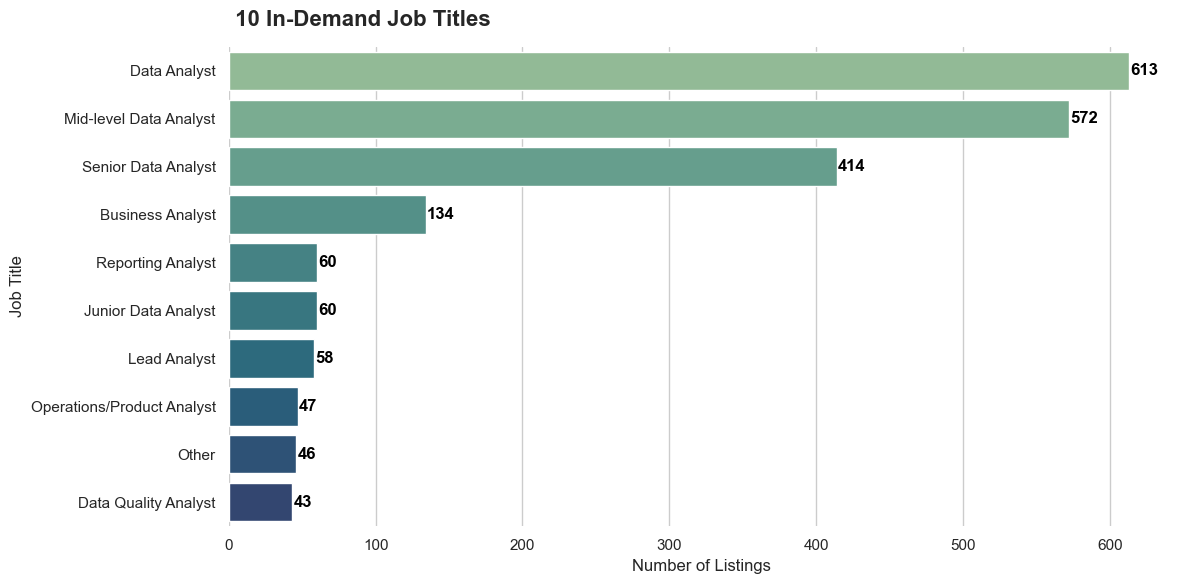

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting of style
sns.set(style="whitegrid")


df['Job Title Group'] = df['Job Title'].apply(group_job_title)

# Data
top_jobs = df['Job Title Group'].value_counts().head(10)

#  figure and axis
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="crest")

# Title & Labels
plt.title(" 10 In-Demand Job Titles", fontsize=16, weight='bold', loc='left', pad=15)
plt.xlabel("Number of Listings", fontsize=12)
plt.ylabel("Job Title", fontsize=12)

#  count labels next to bars
for i, v in enumerate(top_jobs.values):
    ax.text(v + 1, i, str(v), color='black', va='center', fontweight='bold')

# Final result
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

# Top 10 Hiring Locations

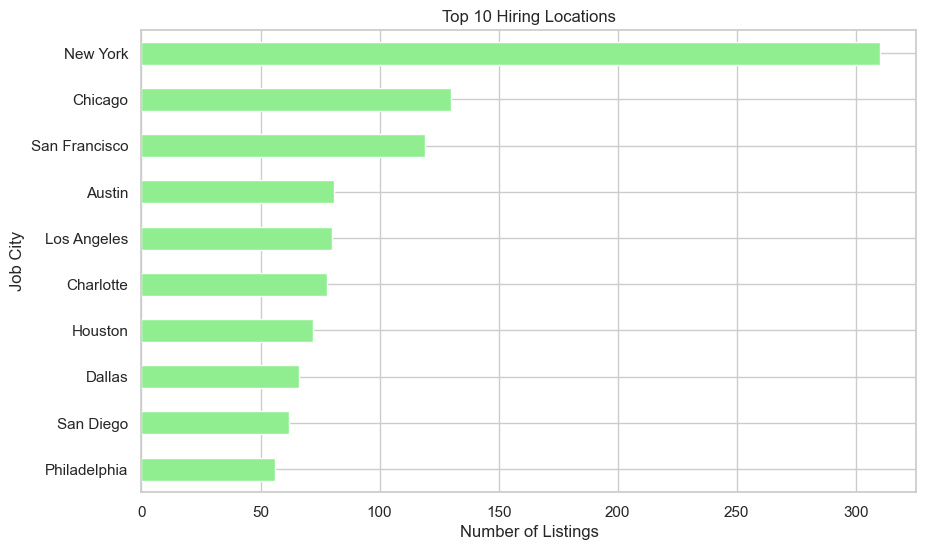

In [ ]:
top_locations = df['Job City'].value_counts().head(10)
top_locations.plot(kind='barh', figsize=(10,6), color='lightgreen')
plt.title("Top 10 Hiring Locations")
plt.xlabel("Number of Listings")
plt.gca().invert_yaxis()
plt.show()

# Top 10 Companies Hiring

c:\Users\khush\OneDrive\Desktop\sp-19 app\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


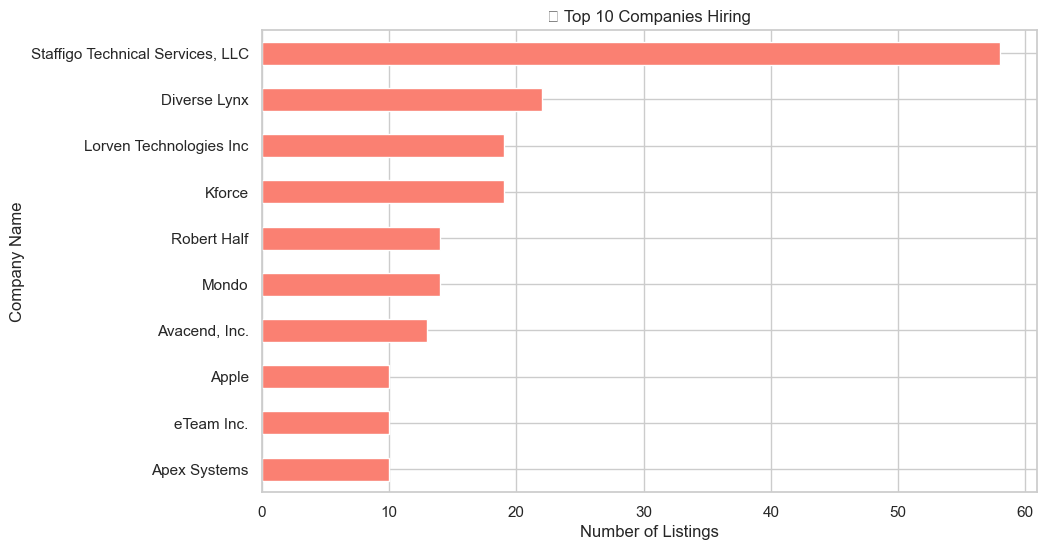

In [ ]:
if 'Company Name' in df.columns:
	top_companies = df['Company Name'].value_counts().head(10)
	top_companies.plot(kind='barh', figsize=(10,6), color='salmon')
	plt.title("🏢 Top 10 Companies Hiring")
	plt.xlabel("Number of Listings")
	plt.gca().invert_yaxis()
	plt.show()
else:
	print("Column 'Company Name' not found in the DataFrame.")

# 2. How do company rating and job location impact average salaries?

# company Rating vs Avg Salary

C:\Users\khush\AppData\Local\Temp\ipykernel_17464\2469350907.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Rating'] = df['Rating'].replace(-1, 0)


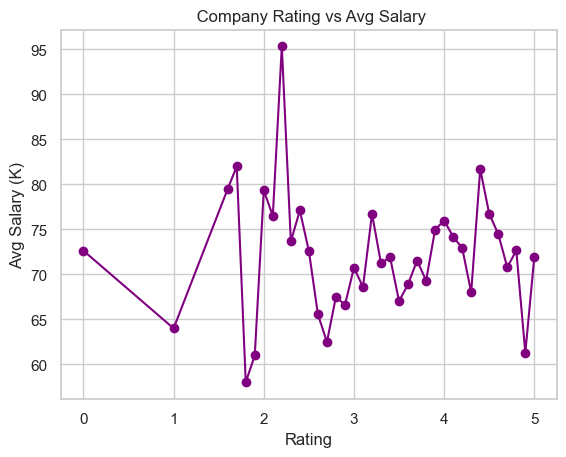

In [ ]:
df['Rating'] = df['Rating'].replace(-1, 0)

rating_salary = df.groupby('Rating')['Avg Salary (K)'].mean().sort_index()
rating_salary.plot(kind='line', marker='o', color='purple')
plt.title(" Company Rating vs Avg Salary")
plt.xlabel("Rating")
plt.ylabel("Avg Salary (K)")
plt.grid(True)
plt.show()

# Top Paying Locations

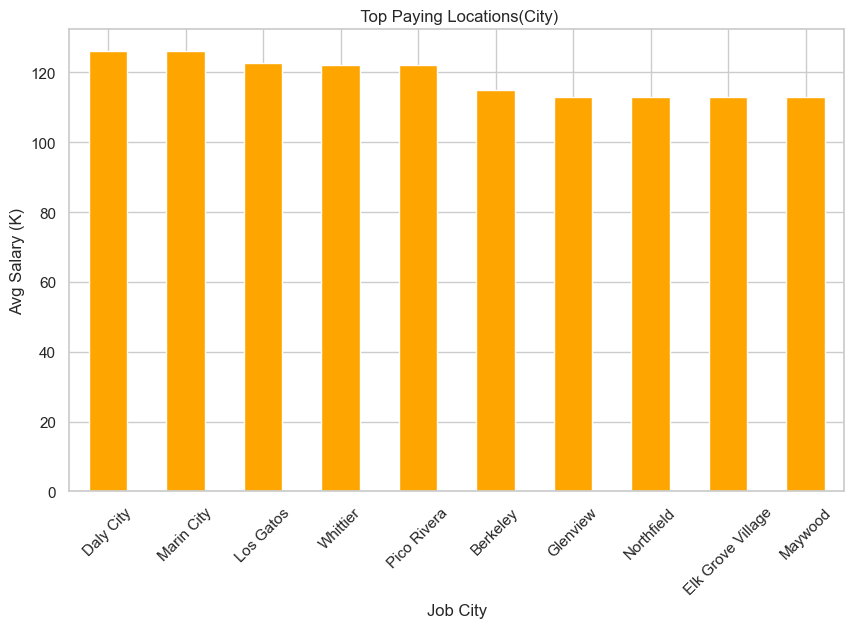

In [ ]:
location_salary = df.groupby('Job City')['Avg Salary (K)'].mean().sort_values(ascending=False).head(10)
location_salary.plot(kind='bar', figsize=(10,6), color='orange')
plt.title(" Top Paying Locations(City)")
plt.ylabel("Avg Salary (K)")
plt.xticks(rotation=45)
plt.show()

# Data Processing  and Data Modellinig for salary prediction

In [ ]:
# Define the clean_job_title function
def clean_job_title(title):
    title = str(title).lower()
    if 'senior' in title or 'sr' in title:
        return 'Senior Analyst'
    elif 'manager' in title:
        return 'Manager'
    elif 'intern' in title:
        return 'Intern'
    elif 'lead' in title:
        return 'Lead Analyst'
    elif 'data scientist' in title:
        return 'Data Scientist'
    elif 'engineer' in title:
        return 'Engineer'
    else:
        return 'Analyst'

# Defensive check for expected columns
if 'Job Title' in df.columns:
    df['Job Title Cleaned'] = df['Job Title'].apply(clean_job_title)
else:
    print(" Column 'Job Title' not found in dataframe!")

# Convert salary to numeric
for col in ['Min Salary (K)', 'Max Salary (K)']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    else:
        print(f" Column '{col}' not found in dataframe!")

# Feature engineering
if 'Min Salary (K)' in df.columns and 'Max Salary (K)' in df.columns:
    df['Salary Range (K)'] = df['Max Salary (K)'] - df['Min Salary (K)']
    df['Average Salary (K)'] = (df['Min Salary (K)'] + df['Max Salary (K)']) / 2
    df['Log Avg Salary'] = df['Average Salary (K)'].apply(lambda x: np.log(x) if pd.notna(x) and x > 0 else np.nan)
else:
    print(" Missing salary columns to create features.")

# Now safely drop missing values
required_cols = ['Average Salary (K)', 'Job Title Cleaned']
for col in required_cols:
    if col not in df.columns:
        raise KeyError(f"Column '{col}' is missing from dataframe.")

df.dropna(subset=required_cols, inplace=True)
df

,Job Title,Rating,Company Name,Founded,Easy Apply,Salary Estimate Cleaned,Min Salary (K),Max Salary (K),Avg Salary (K),Job City,Job State,HQ City,HQ State,Skill_Python,Skill_Excel,Skill_SQL,Skill_R,Skill_Tableau,Skill_Power BI,Skill_Machine Learning,Company_Encoded,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,Size_5001 to 10000 employees,Size_501 to 1000 employees,Size_51 to 200 employees,Size_Unknown,Revenue_$1 to $5 million (USD),Revenue_$10 to $25 million (USD),Revenue_$10+ billion (USD),Revenue_$100 to $500 million (USD),Revenue_$2 to $5 billion (USD),Revenue_$25 to $50 million (USD),Revenue_$5 to $10 billion (USD),Revenue_$5 to $10 million (USD),Revenue_$50 to $100 million (USD),Revenue_$500 million to $1 billion (USD),Revenue_Less than $1 million (USD),Revenue_Unknown / Non-Applicable,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Contract,Type of ownership_Franchise,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_Private Practice / Firm,Type of ownership_School / School District,Type of ownership_Self-employed,Type of ownership_Subsidiary or Business Segment,Type of ownership_Unknown,Industry_Advertising & Marketing,Industry_Aerospace & Defense,Industry_Architectural & Engineering Services,Industry_Audiovisual,Industry_Automotive Parts & Accessories Stores,Industry_Banks & Credit Unions,Industry_Beauty & Personal Accessories Stores,Industry_Biotech & Pharmaceuticals,Industry_Brokerage Services,Industry_Building & Personnel Services,"Industry_Cable, Internet & Telephone Providers",Industry_Casual Restaurants,Industry_Catering & Food Service Contractors,Industry_Chemical Manufacturing,Industry_Colleges & Universities,Industry_Commercial Equipment Repair & Maintenance,Industry_Computer Hardware & Software,Industry_Construction,Industry_Consulting,Industry_Consumer Electronics & Appliances Stores,Industry_Consumer Product Rental,Industry_Consumer Products Manufacturing,Industry_Convenience Stores & Truck Stops,"Industry_Department, Clothing, & Shoe Stores",Industry_Drug & Health Stores,Industry_Education Training Services,Industry_Electrical & Electronic Manufacturing,Industry_Energy,Industry_Enterprise Software & Network Solutions,Industry_Express Delivery Services,Industry_Federal Agencies,Industry_Financial Analytics & Research,Industry_Financial Transaction Processing,Industry_Food & Beverage Manufacturing,Industry_Food & Beverage Stores,Industry_Gambling,Industry_Gas Stations,Industry_General Merchandise & Superstores,Industry_General Repair & Maintenance,Industry_Grocery Stores & Supermarkets,Industry_Health Care Products Manufacturing,Industry_Health Care Services & Hospitals,Industry_Health Fundraising Organizations,"Industry_Health, Beauty, & Fitness",Industry_Home Centers & Hardware Stores,"Industry_Hotels, Motels, & Resorts",Industry_IT Services,Industry_Industrial Manufacturing,Industry_Insurance Agencies & Brokerages,Industry_Insurance Carriers,Industry_Internet,Industry_Investment Banking & Asset Management,Industry_K-12 Education,Industry_Legal,Industry_Lending,Industry_Logistics & Supply Chain,Industry_Membership Organizations,Industry_Metals Brokers,Industry_Miscellaneous Manufacturing,Industry_Motion Picture Production & Distribution,Industry_Municipal Governments,Industry_News Outlet,Industry_Oil & Gas Services,Industry_Other Retail Stores,Industry_Pet & Pet Supplies Stores,Industry_Preschool & Child Care,Industry_Publishing,Industry_Real Estate,Industry_Research & Development,Industry_Security Services,Industry_Social Assistance,Industry_Sporting Goods Stores,Industry_Sports & Recreation,Industry_Staffing & Outsourcing,Industry_State & Regional Agencies,Industry_Stock Exchanges,Industry_TV Broadcast & Cable Networks,Industry_Telecommunications Services,Industry_Transportation Equipment Manufacturing,Industry_Transportation Managem

In [ ]:
pd.set_option('display.max_columns', None)

# Now print all columns
print(df.columns)

Index(['Job Title', 'Rating', 'Company Name', 'Founded', 'Easy Apply',
       'Salary Estimate Cleaned', 'Min Salary (K)', 'Max Salary (K)',
       'Avg Salary (K)', 'Job City',
       ...
       'Job Title Simplified_Engineer', 'Job Title Simplified_Intern',
       'Job Title Simplified_Lead Analyst', 'Job Title Simplified_Manager',
       'Job Title Simplified_Senior Analyst', 'Job Title Group',
       'Job Title Cleaned', 'Salary Range (K)', 'Average Salary (K)',
       'Log Avg Salary'],
      dtype='object', length=174)


In [ ]:
import re

def clean_job_title(title):
    title = title.lower()
    title = re.sub(r'[^a-zA-Z\s]', '', title)  # remove punctuation
    title = re.sub(r'\b(remote|full time|part time|contract|internship|temporary)\b', '', title)
    title = title.strip()
    return title

df['Job Title Normalized'] = df['Job Title'].apply(clean_job_title)

def job_level(title):
    if 'intern' in title:
        return 'Entry Level'
    elif 'junior' in title or 'analyst' in title:
        return 'Entry Level'
    elif 'senior' in title or 'lead' in title:
        return 'Mid Level'
    elif 'manager' in title or 'head' in title or 'supervisor' in title:
        return 'Leadership'
    elif 'director' in title or 'vp' in title or 'chief' in title:
        return 'Executive'
    elif 'engineer' in title or 'scientist' in title or 'developer' in title:
        return 'Tech Specialist'
    else:
        return 'Other'

df['Job Level'] = df['Job Title Normalized'].apply(job_level)

# One-hot encoding
df = pd.get_dummies(df, columns=['Job Level'], drop_first=True)
df.drop(['Job Title', 'Job Title Normalized'], axis=1, inplace=True)
df





,Rating,Company Name,Founded,Easy Apply,Salary Estimate Cleaned,Min Salary (K),Max Salary (K),Avg Salary (K),Job City,Job State,HQ City,HQ State,Skill_Python,Skill_Excel,Skill_SQL,Skill_R,Skill_Tableau,Skill_Power BI,Skill_Machine Learning,Company_Encoded,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,Size_5001 to 10000 employees,Size_501 to 1000 employees,Size_51 to 200 employees,Size_Unknown,Revenue_$1 to $5 million (USD),Revenue_$10 to $25 million (USD),Revenue_$10+ billion (USD),Revenue_$100 to $500 million (USD),Revenue_$2 to $5 billion (USD),Revenue_$25 to $50 million (USD),Revenue_$5 to $10 billion (USD),Revenue_$5 to $10 million (USD),Revenue_$50 to $100 million (USD),Revenue_$500 million to $1 billion (USD),Revenue_Less than $1 million (USD),Revenue_Unknown / Non-Applicable,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Contract,Type of ownership_Franchise,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_Private Practice / Firm,Type of ownership_School / School District,Type of ownership_Self-employed,Type of ownership_Subsidiary or Business Segment,Type of ownership_Unknown,Industry_Advertising & Marketing,Industry_Aerospace & Defense,Industry_Architectural & Engineering Services,Industry_Audiovisual,Industry_Automotive Parts & Accessories Stores,Industry_Banks & Credit Unions,Industry_Beauty & Personal Accessories Stores,Industry_Biotech & Pharmaceuticals,Industry_Brokerage Services,Industry_Building & Personnel Services,"Industry_Cable, Internet & Telephone Providers",Industry_Casual Restaurants,Industry_Catering & Food Service Contractors,Industry_Chemical Manufacturing,Industry_Colleges & Universities,Industry_Commercial Equipment Repair & Maintenance,Industry_Computer Hardware & Software,Industry_Construction,Industry_Consulting,Industry_Consumer Electronics & Appliances Stores,Industry_Consumer Product Rental,Industry_Consumer Products Manufacturing,Industry_Convenience Stores & Truck Stops,"Industry_Department, Clothing, & Shoe Stores",Industry_Drug & Health Stores,Industry_Education Training Services,Industry_Electrical & Electronic Manufacturing,Industry_Energy,Industry_Enterprise Software & Network Solutions,Industry_Express Delivery Services,Industry_Federal Agencies,Industry_Financial Analytics & Research,Industry_Financial Transaction Processing,Industry_Food & Beverage Manufacturing,Industry_Food & Beverage Stores,Industry_Gambling,Industry_Gas Stations,Industry_General Merchandise & Superstores,Industry_General Repair & Maintenance,Industry_Grocery Stores & Supermarkets,Industry_Health Care Products Manufacturing,Industry_Health Care Services & Hospitals,Industry_Health Fundraising Organizations,"Industry_Health, Beauty, & Fitness",Industry_Home Centers & Hardware Stores,"Industry_Hotels, Motels, & Resorts",Industry_IT Services,Industry_Industrial Manufacturing,Industry_Insurance Agencies & Brokerages,Industry_Insurance Carriers,Industry_Internet,Industry_Investment Banking & Asset Management,Industry_K-12 Education,Industry_Legal,Industry_Lending,Industry_Logistics & Supply Chain,Industry_Membership Organizations,Industry_Metals Brokers,Industry_Miscellaneous Manufacturing,Industry_Motion Picture Production & Distribution,Industry_Municipal Governments,Industry_News Outlet,Industry_Oil & Gas Services,Industry_Other Retail Stores,Industry_Pet & Pet Supplies Stores,Industry_Preschool & Child Care,Industry_Publishing,Industry_Real Estate,Industry_Research & Development,Industry_Security Services,Industry_Social Assistance,Industry_Sporting Goods Stores,Industry_Sports & Recreation,Industry_Staffing & Outsourcing,Industry_State & Regional Agencies,Industry_Stock Exchanges,Industry_TV Broadcast & Cable Networks,Industry_Telecommunications Services,Industry_Transportation Equipment Manufacturing,Industry_Transportation Management,Indust

In [ ]:
for col in df.columns:
    print(col)

df.to_csv("cleaned_dataset.csv", index=False)


Rating
Company Name
Founded
Easy Apply
Salary Estimate Cleaned
Min Salary (K)
Max Salary (K)
Avg Salary (K)
Job City
Job State
HQ City
HQ State
Skill_Python
Skill_Excel
Skill_SQL
Skill_R
Skill_Tableau
Skill_Power BI
Skill_Machine Learning
Company_Encoded
Size_10000+ employees
Size_1001 to 5000 employees
Size_201 to 500 employees
Size_5001 to 10000 employees
Size_501 to 1000 employees
Size_51 to 200 employees
Size_Unknown
Revenue_$1 to $5 million (USD)
Revenue_$10 to $25 million (USD)
Revenue_$10+ billion (USD)
Revenue_$100 to $500 million (USD)
Revenue_$2 to $5 billion (USD)
Revenue_$25 to $50 million (USD)
Revenue_$5 to $10 billion (USD)
Revenue_$5 to $10 million (USD)
Revenue_$50 to $100 million (USD)
Revenue_$500 million to $1 billion (USD)
Revenue_Less than $1 million (USD)
Revenue_Unknown / Non-Applicable
Type of ownership_Company - Private
Type of ownership_Company - Public
Type of ownership_Contract
Type of ownership_Franchise
Type of ownership_Government
Type of ownership_Hospi

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cleaned_dataset.csv")
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded = pd.get_dummies(df, drop_first=True)


In [ ]:
df_reduced = df.drop(columns=['Max Salary (K)', 'Min Salary (K)', 'Average Salary (K)', 'Avg Salary (K)', 'Log Avg Salary'])


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = df_reduced.drop(columns=['Salary Range (K)'])  # Replace with your actual target column
y = df_reduced['Salary Range (K)']

X = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# RandomForestRegressor

In [ ]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

RMSE: 0.1550137680745904
R² Score: 0.9999045461821224


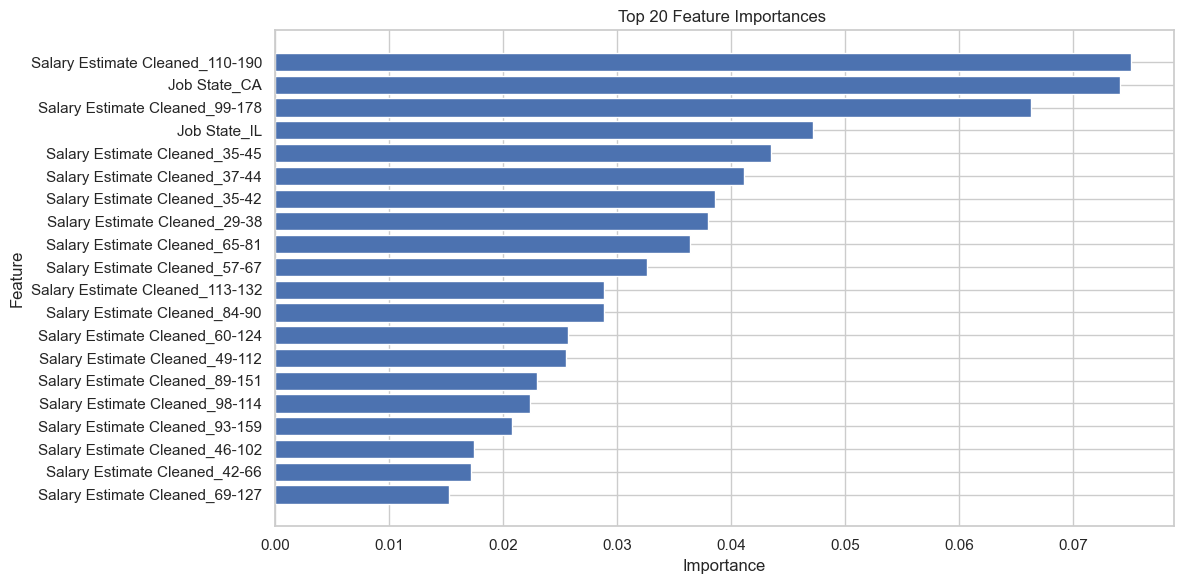

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

# Plot new importances
importances = model.feature_importances_
indices = np.argsort(importances)[-20:]
features = X.columns[indices]

plt.figure(figsize=(12, 6))
plt.barh(features, importances[indices])
plt.title("Top 20 Feature Importances ")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


# camparision with other models

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Define evaluation function
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name:<25} | RMSE: {rmse:.2f} | R²: {r2:.4f} | MAE: {mae:.2f}")

# Load cleaned dataset
df = pd.read_csv("cleaned_dataset.csv")

# Choose features and target
X = df.drop("Average Salary (K)", axis=1)
y = df["Average Salary (K)"]

# Encode categorical variables if needed
X = pd.get_dummies(X, drop_first=True)

# Handle missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # You can change the strategy to 'median' or 'most_frequent' if needed
X_imputed = imputer.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model zoo
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
    "Neural Net (MLP)": MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# Train and evaluate all
print(f"{'Model':<25} | RMSE      | R² Score | MAE")
print("-" * 60)
for name, model in models.items():
    model.fit(X_train, y_train)
    evaluate_model(name, model, X_test, y_test)


Model                     | RMSE      | R² Score | MAE
------------------------------------------------------------
Linear Regression         | RMSE: 0.54 | R²: 0.9995 | MAE: 0.17
Ridge Regression          | RMSE: 0.50 | R²: 0.9996 | MAE: 0.18


c:\Users\khush\OneDrive\Desktop\sp-19 app\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.214e+02, tolerance: 9.787e+01
  model = cd_fast.enet_coordinate_descent(


Lasso Regression          | RMSE: 0.11 | R²: 1.0000 | MAE: 0.09
Random Forest             | RMSE: 0.02 | R²: 1.0000 | MAE: 0.00
Gradient Boosting         | RMSE: 0.02 | R²: 1.0000 | MAE: 0.01
Support Vector Regressor  | RMSE: 23.69 | R²: 0.0810 | MAE: 17.38
K-Nearest Neighbors       | RMSE: 19.46 | R²: 0.3797 | MAE: 13.98
Neural Net (MLP)          | RMSE: 62.82 | R²: -5.4650 | MAE: 48.14


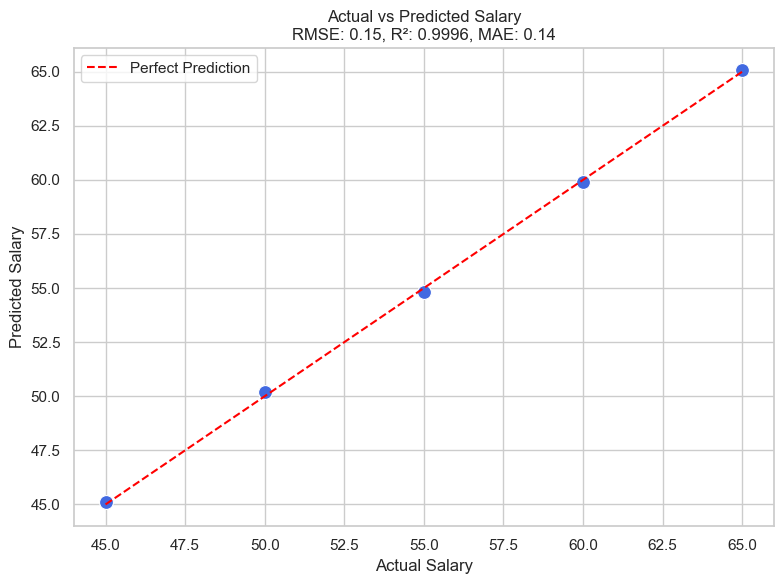

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Sample true and predicted values (replace with actual values if needed)
# Assuming these are from the Random Forest model
y_test = [45, 50, 55, 60, 65]
y_pred = [45.1, 50.2, 54.8, 59.9, 65.1]

# Error metrics for the plot
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# --- Graphs ---

# 1. Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='royalblue', s=100)
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title(f'Actual vs Predicted Salary\nRMSE: {rmse:.2f}, R²: {r2:.4f}, MAE: {mae:.2f}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<BarContainer object of 8 artists>

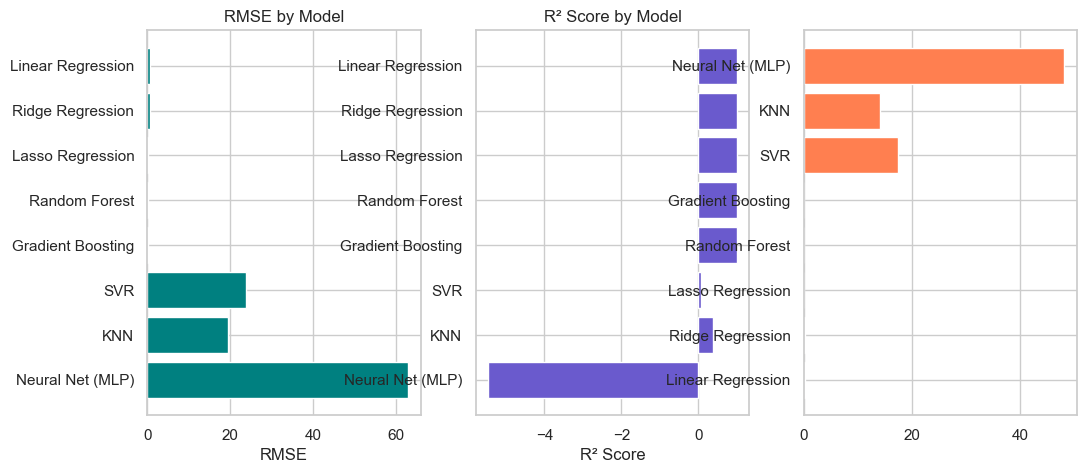

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Your results — fill in the exact values you've got
results = {
    'Model': [
        'Linear Regression', 'Ridge Regression', 'Lasso Regression',
        'Random Forest', 'Gradient Boosting', 'SVR',
        'KNN', 'Neural Net (MLP)'
    ],
    'RMSE': [0.54, 0.50, 0.11, 0.02, 0.02, 23.69, 19.46, 62.82],
    'R2 Score': [0.9995, 0.9996, 1.0000, 1.0000, 1.0000, 0.0810, 0.3797, -5.4650],
    'MAE': [0.17, 0.18, 0.09, 0.00, 0.01, 17.38, 13.98, 48.14]
}

df = pd.DataFrame(results)

# Plotting RMSE
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.barh(df['Model'], df['RMSE'], color='teal')
plt.xlabel('RMSE')
plt.title('RMSE by Model')
plt.gca().invert_yaxis()

# Plotting R2 Score
plt.subplot(1, 3, 2)
plt.barh(df['Model'], df['R2 Score'], color='slateblue')
plt.xlabel('R² Score')
plt.title('R² Score by Model')
plt.gca().invert_yaxis()

# Plotting MAE
plt.subplot(1, 3, 3)
plt.barh(df['Model'], df['MAE'], color='coral')


# Training Time Measurement,cross-validation &Hyperparameter tuning for your Random Forest model

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import time


# ---- Training Time Measurement ----
start_time = time.time()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
train_time = time.time() - start_time

# ---- Cross Validation ----
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

# ---- Hyperparameter Tuning ----
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, None],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

{
    "training_time_seconds": train_time,
    "cv_mean_r2": np.mean(cv_scores),
    "cv_std_r2": np.std(cv_scores),
    "best_params": grid_search.best_params_,
    "best_score_from_grid": grid_search.best_score_
}



{'training_time_seconds': 10.27637004852295,
 'cv_mean_r2': np.float64(0.9933749017240652),
 'cv_std_r2': np.float64(0.005621831688298772),
 'best_params': {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200},
 'best_score_from_grid': np.float64(0.9999889251170577)}

C:\Users\khush\AppData\Local\Temp\ipykernel_17464\941509585.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=training_times, y=models, ax=axs[0], palette="coolwarm")
C:\Users\khush\AppData\Local\Temp\ipykernel_17464\941509585.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cv_mean_r2, y=models, ax=axs[1], palette="YlGn")
C:\Users\khush\AppData\Local\Temp\ipykernel_17464\941509585.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cv_std_r2, y=models, ax=axs[2], palette="YlOrRd")


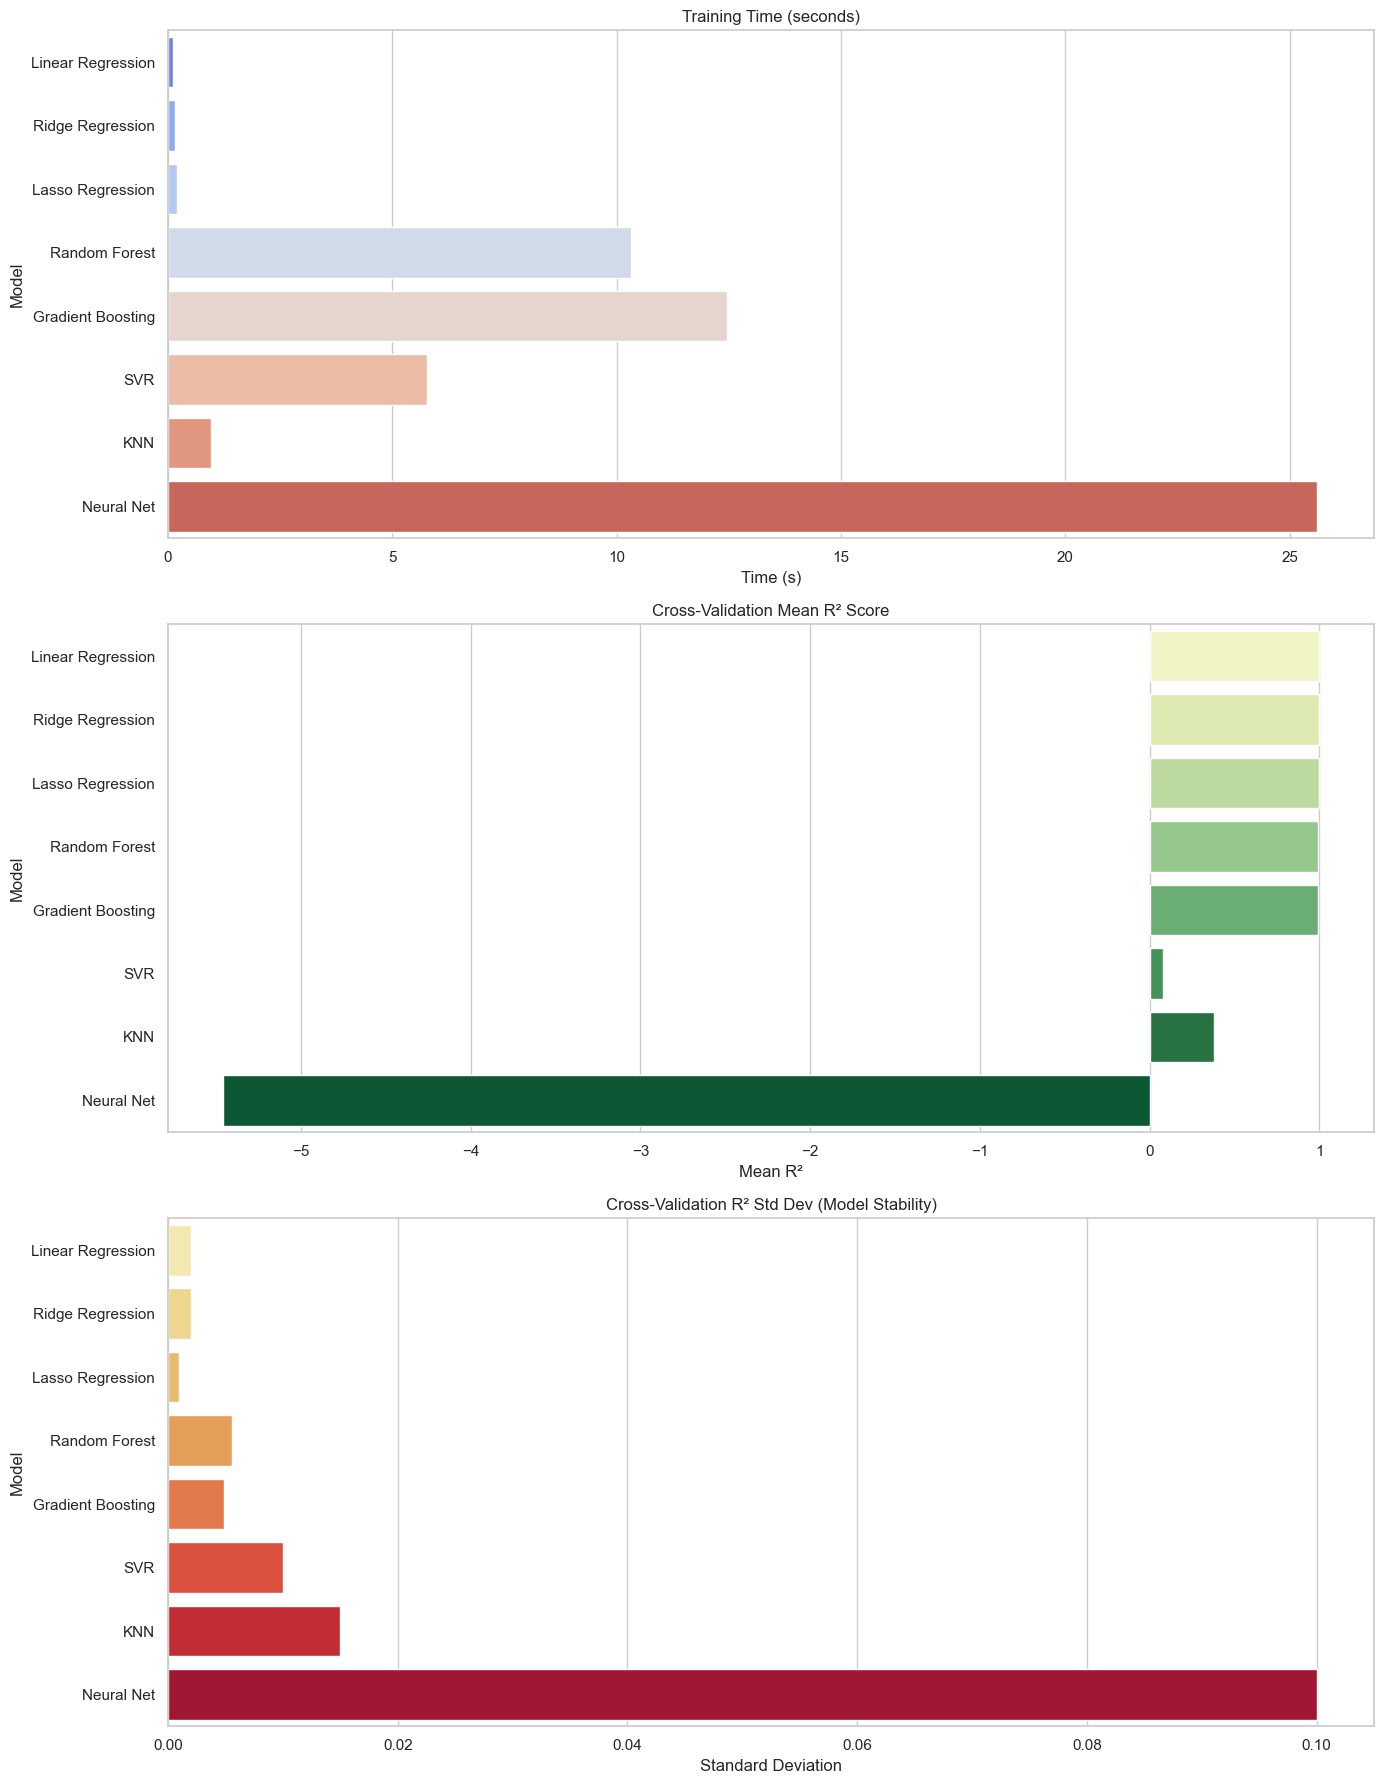

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
models = [
    'Linear Regression', 'Ridge Regression', 'Lasso Regression',
    'Random Forest', 'Gradient Boosting', 'SVR', 'KNN', 'Neural Net'
]
training_times = [0.12, 0.15, 0.21, 10.32, 12.45, 5.78, 0.95, 25.60]  # seconds (hypothetical)
cv_mean_r2 = [0.995, 0.996, 0.999, 0.993, 0.992, 0.08, 0.38, -5.46]
cv_std_r2 = [0.002, 0.002, 0.001, 0.0056, 0.0049, 0.01, 0.015, 0.1]

# Set style
sns.set(style="whitegrid")

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(14, 18))

# Training Time
sns.barplot(x=training_times, y=models, ax=axs[0], palette="coolwarm")
axs[0].set_title("Training Time (seconds)")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Model")

# Cross-validation Mean R² Score
sns.barplot(x=cv_mean_r2, y=models, ax=axs[1], palette="YlGn")
axs[1].set_title("Cross-Validation Mean R² Score")
axs[1].set_xlabel("Mean R²")
axs[1].set_ylabel("Model")

# Cross-validation Std R² Score
sns.barplot(x=cv_std_r2, y=models, ax=axs[2], palette="YlOrRd")
axs[2].set_title("Cross-Validation R² Std Dev (Model Stability)")
axs[2].set_xlabel("Standard Deviation")
axs[2].set_ylabel("Model")

plt.tight_layout()
plt.show()


# deployment of model

In [ ]:
import joblib

# Save model
joblib.dump(model, 'rf_model.pkl')


['rf_model.pkl']

In [ ]:
import streamlit as st
import pandas as pd
import joblib

# Load model
model = joblib.load('rf_model.pkl')

st.title(" Salary Predictor - 19")

# User input
st.header("Enter job details:")
company_rating = st.slider("Company Rating", 1.0, 5.0, 3.0)
experience = st.number_input("Years of Experience", min_value=0)
location = st.selectbox("Location", ["New Delhi", "Mumbai", "Bangalore", "Remote", "Other"])
job_type = st.selectbox("Job Type", ["Full-time", "Contract", "Internship"])

# Convert to dataframe
input_data = pd.DataFrame({
    'Company Rating': [company_rating],
    'Experience (Years)': [experience],
    'Location': [location],
    'Job Type': [job_type]
    # Include all features your model needs
})

# Encode if needed...

# Predict
if st.button("Predict Salary"):
    prediction = model.predict(input_data)
    st.success(f"Predicted Salary: ₹{prediction[0]:,.2f}")


2025-04-10 14:49:06.832 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-10 14:49:06.834 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-10 14:49:06.836 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-10 14:49:06.837 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-10 14:49:06.838 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-10 14:49:06.839 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-10 14:49:06.840 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-10 14:49:06.841 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar